# CS 135 day05: Bias and Variance

In [ ]:
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Simple sine-wave dataset

As in the day04 lab, we're going to simulate a toy sin wave dataset. In this dataset, the relationship between the input feature $x$ and the target $y$ is given by 
$$y_i = 2\cdot\sin(2.1\cdot x_i)+\epsilon$$
Where $\epsilon$ is some random noise. This is called the **data generating process**. When we're fitting a model to this data, we're trying to fit the underlying trend (the sin part) and not the random meaningless noise. 

Let's simulate a dataset and take a look:

In [ ]:
def true_prediction_function(x):
    return 2.0 * np.sin(2.1 * x)

def generate_sinwave_dataset(seed, N=12):
    prng = np.random.RandomState(seed)

    x_tr_N = np.linspace(-3, 3, N) + 0.09 * prng.randn(N)
    y_tr_N = true_prediction_function(x_tr_N) + 1.5 * prng.randn(N)
    return x_tr_N, y_tr_N

x_grid = np.linspace(-3,3,1000)

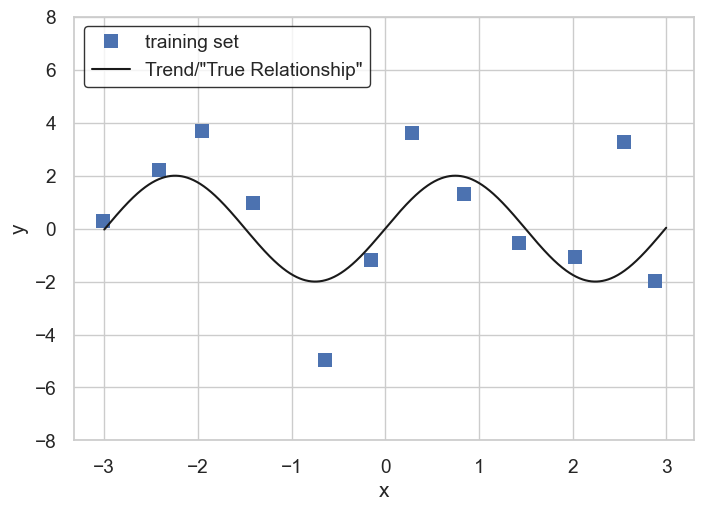

In [ ]:
SEED = 12345

x_tr_N, y_tr_N = generate_sinwave_dataset(SEED, N=12)

plt.plot(x_tr_N, y_tr_N, 'bs', markersize=10, label='training set')
plt.plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')

plt.legend(loc='upper left', frameon=True, edgecolor='black');
plt.xlabel('x');
plt.ylabel('y');
plt.ylim([- 8, + 8]);

Now imagine that you and your 4 closest friends are all trying to fit build the same model. You start by each collecting your own data set: 

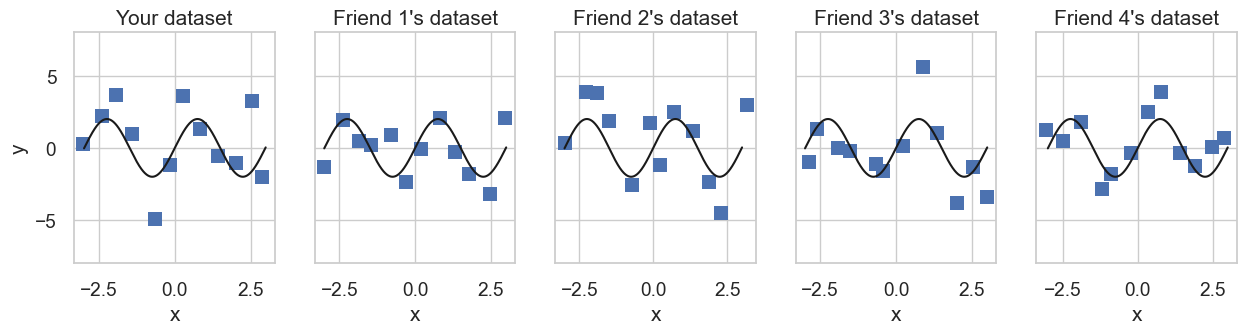

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, sharey=True,
    figsize=(15,3))

x_tr_Ns = []
y_tr_Ns = []

for i in range(5):
    x_tr_N, y_tr_N = generate_sinwave_dataset(SEED + i, N=12)
    x_tr_Ns.append(x_tr_N)
    y_tr_Ns.append(y_tr_N)
    
    ax[i].plot(x_tr_N, y_tr_N, 'bs', markersize=10, label='training set')
    ax[i].plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')
    
    ax[i].set_xlabel('x');
    ax[i].set_ylim([- 8, + 8]);

ax[0].set_ylabel('y');
ax[0].set_title('Your dataset');
ax[1].set_title('Friend 1\'s dataset');
ax[2].set_title('Friend 2\'s dataset');
ax[3].set_title('Friend 3\'s dataset');
ax[4].set_title('Friend 4\'s dataset');

(None of you can see the underlying ground truth relationship. You only see your data points)

First let's consider the case where you all decide to do linear regression. 

## Fitting a Linear Model

In [ ]:
import sklearn.linear_model
import sklearn.pipeline

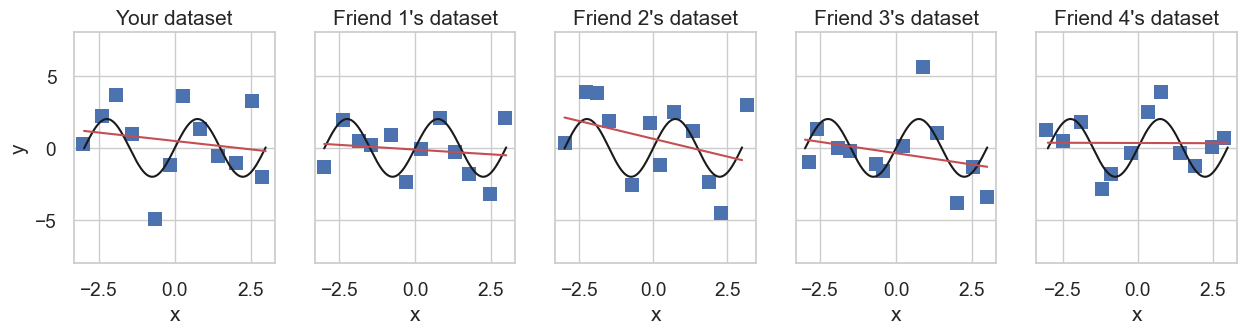

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, sharey=True,
    figsize=(15,3))

lin_reg_models = []

for i in range(5):
    x_tr_N, y_tr_N = x_tr_Ns[i], y_tr_Ns[i] # grab the ith dataset
    
    # fit the model to the data
    lin_regr = sklearn.linear_model.LinearRegression()
    lin_regr.fit(x_tr_N[:,np.newaxis], y_tr_N)
    lin_reg_models.append(lin_regr)

    y_hats_N = lin_regr.predict(x_grid[:,np.newaxis])
    ax[i].plot(x_tr_N, y_tr_N, 'bs', markersize=10, label='training set')
    ax[i].plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')
    ax[i].plot(x_grid, y_hats_N, 'r-', markersize=10, label='Predicted Relationship')
    
    ax[i].set_xlabel('x');
    ax[i].set_ylim([- 8, + 8]);

ax[0].set_ylabel('y');
ax[0].set_title('Your dataset');
ax[1].set_title('Friend 1\'s dataset');
ax[2].set_title('Friend 2\'s dataset');
ax[3].set_title('Friend 3\'s dataset');
ax[4].set_title('Friend 4\'s dataset');

To map this to the "dart throwing" analogy, each attempt is like a different thrown dart. If you run linear regression on the same dataset you'll get the same results, so when we talk about how accurate your model is "on average", we're talking about how it varies across different realizations of the data generating process.

Let's plot these on top of each other

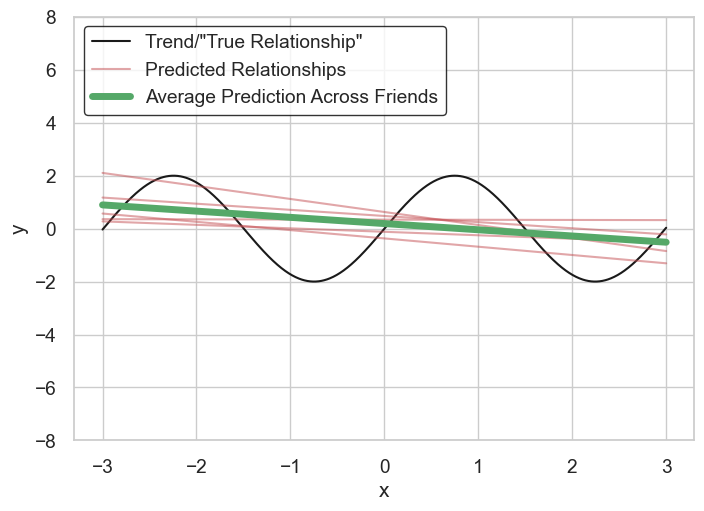

In [ ]:
plt.plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')

all_y_hats = []

for i in range(5):
    y_hats_N = lin_reg_models[i].predict(x_grid[:,np.newaxis])
    plt.plot(x_grid, y_hats_N, 'r-', alpha=0.5, markersize=10, label='Predicted Relationships' if i == 0 else None)

    all_y_hats.append(y_hats_N)


mean_y_hat_N = np.mean(np.stack(all_y_hats),axis=0)
plt.plot(x_grid, mean_y_hat_N, 'g-', linewidth=5, label='Average Prediction Across Friends')

plt.legend(loc='upper left', frameon=True, edgecolor='black');
plt.xlabel('x');
plt.ylabel('y');
plt.ylim([- 8, + 8]);

### Question 1: High Bias or High Variance?

Does this approach to estimating the true underlying relationship seem high bias to you? Or does it seem high variance? If you get stuck, you can look at the next problem setting and see if it makes things more clear.

In [ ]:
# TODO

## Fitting a high degree polynomial model

Let's repeat this process, but instead of trying to fit a line you each try to fit a highly flexible model like a 6th-degree polynomial.

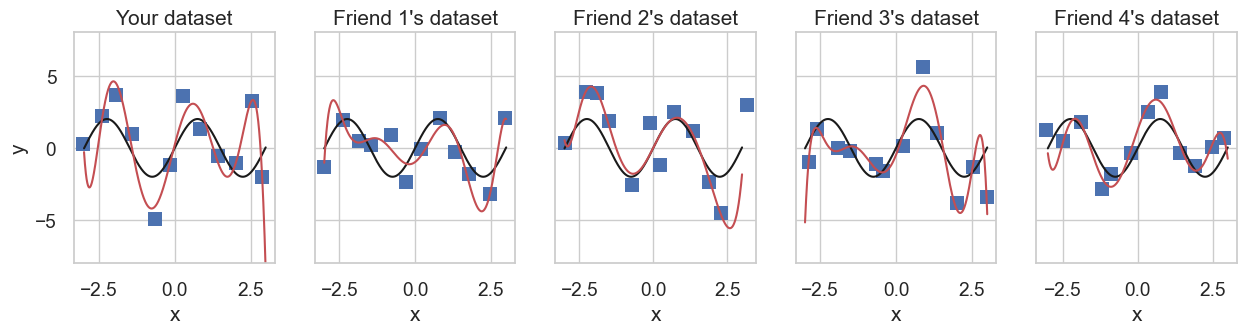

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=5, sharey=True,
    figsize=(15,3))

poly_reg_models = []

for i in range(5):
    x_tr_N, y_tr_N = x_tr_Ns[i], y_tr_Ns[i] # grab the ith dataset
    
    # fit the model to the data
    poly_regr = pipeline = sklearn.pipeline.Pipeline([
        ("step1", sklearn.preprocessing.PolynomialFeatures(8)), # create custom Poly featurizer
        ("step2", sklearn.linear_model.LinearRegression()),
        ])
    poly_regr.fit(x_tr_N[:,np.newaxis], y_tr_N)
    poly_reg_models.append(poly_regr)

    y_hats_N = poly_regr.predict(x_grid[:,np.newaxis])
    ax[i].plot(x_tr_N, y_tr_N, 'bs', markersize=10, label='training set')
    ax[i].plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')
    ax[i].plot(x_grid, y_hats_N, 'r-', markersize=10, label='Predicted Relationship')
    
    ax[i].set_xlabel('x');
    ax[i].set_ylim([- 8, + 8]);

ax[0].set_ylabel('y');
ax[0].set_title('Your dataset');
ax[1].set_title('Friend 1\'s dataset');
ax[2].set_title('Friend 2\'s dataset');
ax[3].set_title('Friend 3\'s dataset');
ax[4].set_title('Friend 4\'s dataset');

Let's look at the different models on top of each other:

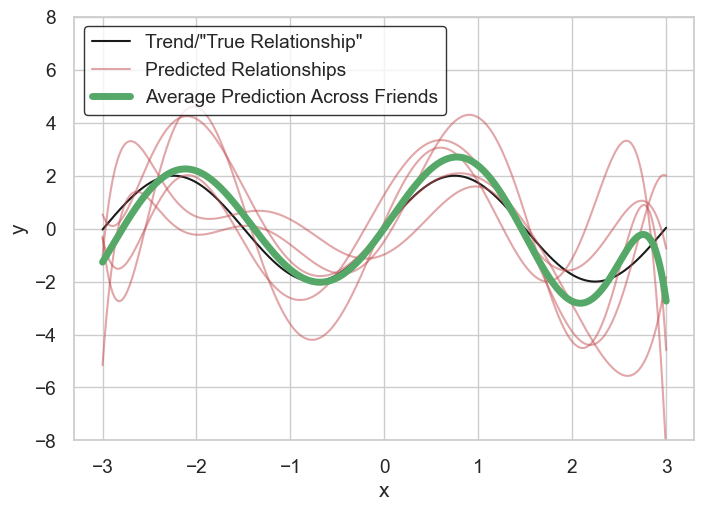

In [ ]:
plt.plot(x_grid, true_prediction_function(x_grid), 'k-', markersize=10, label='Trend/"True Relationship"')

all_y_hats = []

for i in range(5):
    y_hats_N = poly_reg_models[i].predict(x_grid[:,np.newaxis])
    plt.plot(x_grid, y_hats_N, 'r-', alpha=0.5, markersize=10, label='Predicted Relationships' if i == 0 else None)

    all_y_hats.append(y_hats_N)


mean_y_hat_N = np.mean(np.stack(all_y_hats),axis=0)
plt.plot(x_grid, mean_y_hat_N, 'g-', linewidth=5, label='Average Prediction Across Friends')

plt.legend(loc='upper left', frameon=True, edgecolor='black');
plt.xlabel('x');
plt.ylabel('y');
plt.ylim([- 8, + 8]);

### Question 2: High Bias or High Variance?

Does this approach to estimating the true underlying relationship seem high bias to you? Or does it seem high variance? 

In [ ]:
# TODO

### Question 3: Bias vs dataset size

How does the tradeoff between bias and variance interact with dataset size? e.g. if each friend had collected 10 times as much data, how would the performance of the two techniques above change? Feel free to rerun the code above with different-sized datasets.

### Question 4: Which of these can be measured?

In general you won't have 5 different replicated datasets from the same underlying process; you'll have 1. Given only 1 dataset, which of these quantities can you measure: (a) bias, (b) variance, and (c) average squared error from your function to the true underlying relationship?

In [ ]:
def pretty_print_weights(pipeline):
    preproc = pipeline.named_steps['preproc']
    feat_names = preproc.get_feature_names_out(['x'])
    for ff in range(len(feat_names)):
        coef_val_ff = pipeline.named_steps['regr'].coef_[ff]
        if np.allclose(coef_val_ff, 0):
            w_ff_str = "   0      exactly"
        else:
            w_ff_str = "% 8.3f" % coef_val_ff
        print("Feature %5s: weight coef %s" % (feat_names[ff], w_ff_str))
            
    print("Intercept    : weight coef % 8.3f" % (pipeline.named_steps['regr'].intercept_))

### Math BONUS: Some intuition why variance is always bad

It is common for students to have the following question:

"If your bias is small, then of course you'd rather be low variance. But if your bias is large then why does variance matter? Is it really worse to be inaccurate and spread out vs inaccurate and always consistent?"

Playing with numbers can help. Consider the following scenario: 
- The correct answer that two people are trying to guess is always 0.
- One player always guesses 5.
- The other player guesses 4 half of the time, and 6 the other half of the time.

Both players have the same average guess: 5. You can compute the bias, variance, and average squared error for both players and see that the consistent one is better.

In [ ]:
# TODO some math, check your work against the solutions.

"But the reason this works this way is because of squared error!" You will say. "If we had used absolute error, then both players would have the same average error: 5. So is variance only bad because we've chosen this error metric?"

The answer to this question is no. In this *particular* example, the average (absolute) error is the same as the (absolute) error of the average. But that isn't always the case. Consider a scenario where one player sometimes guesses 4 and sometimes guesses -4. Then the average absolute error is 4, but the bias (aka the error of the average guess) is 0. 

Mean squared error is mathematically convenient because it can be decomposed into bias and variance. There is no way to decompose mean absolute error that works in general.